In [1]:
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
sys.path.append(os.path.abspath("../scripts"))

In [3]:
from db_utils import connect_to_database, fetch_data, close_connection
from queries import query_telecom_data

In [4]:
# Connect to the database using parameters from the .env file
conn = connect_to_database()

Database connection successful!


In [5]:
query="SELECT * from xdr_data;"

In [6]:
# Fetch data using the query
if conn:
    telecom_data = fetch_data(conn, query)
    close_connection(conn)

# Display the first few rows of the data
if telecom_data is not None:
    print(telecom_data.head())

c:\Users\user\Projects\Business-Data-Analysis-for-TellCo\scripts\db_utils.py:43: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


Data fetched successfully!
Database connection closed!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                

In [7]:
# Aggregate user experience metrics
experience_data = telecom_data.groupby("MSISDN/Number").agg({
    "Avg RTT DL (ms)": "mean",
    "Avg RTT UL (ms)": "mean",
    "Avg Bearer TP DL (kbps)": "mean",
    "Avg Bearer TP UL (kbps)": "mean",
    "TCP DL Retrans. Vol (Bytes)": "sum",
    "TCP UL Retrans. Vol (Bytes)": "sum"
}).reset_index()

# Rename columns for clarity
experience_data.rename(columns={
    "Avg RTT DL (ms)": "Avg RTT DL (ms)",
    "Avg RTT UL (ms)": "Avg RTT UL (ms)",
    "Avg Bearer TP DL (kbps)": "Avg Throughput DL (kbps)",
    "Avg Bearer TP UL (kbps)": "Avg Throughput UL (kbps)",
    "TCP DL Retrans. Vol (Bytes)": "Total TCP Retransmissions DL (Bytes)",
    "TCP UL Retrans. Vol (Bytes)": "Total TCP Retransmissions UL (Bytes)"
}, inplace=True)

# Display the first few rows
print(experience_data.head())


   MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Throughput DL (kbps)  \
0   3.360100e+10             46.0              0.0                      37.0   
1   3.360100e+10             30.0              1.0                      48.0   
2   3.360100e+10              NaN              NaN                      48.0   
3   3.360101e+10             69.0             15.0                     204.0   
4   3.360101e+10             57.0              2.5                   20197.5   

   Avg Throughput UL (kbps)  Total TCP Retransmissions DL (Bytes)  \
0                      39.0                                   0.0   
1                      51.0                                   0.0   
2                      49.0                                   0.0   
3                      44.0                                1066.0   
4                    8224.5                             9349630.0   

   Total TCP Retransmissions UL (Bytes)  
0                                   0.0  
1                   

In [8]:
# Sort by RTT DL and RTT UL
top_users_rtt = experience_data.nsmallest(10, "Avg RTT DL (ms)")
bottom_users_rtt = experience_data.nlargest(10, "Avg RTT DL (ms)")

# Display results
print("Top Users by Avg RTT DL:\n", top_users_rtt)
print("Bottom Users by Avg RTT DL:\n", bottom_users_rtt)


Top Users by Avg RTT DL:
         MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
28878    3.365298e+10              0.0              0.0   
40873    3.366064e+10              0.0             29.0   
44748    3.366158e+10              0.0              0.0   
66098    3.366748e+10              0.0            785.0   
88903    3.369954e+10              0.0             33.0   
98541    3.376275e+10              0.0             38.0   
39066    3.366020e+10              2.0              0.0   
83396    3.369505e+10              4.0              0.0   
36039    3.365949e+10              5.0              0.0   
106569   3.378806e+10              5.0             25.0   

        Avg Throughput DL (kbps)  Avg Throughput UL (kbps)  \
28878                       52.0                      48.0   
40873                       63.0                      54.0   
44748                       38.0                      47.0   
66098                       43.0                      47.0   
88903         

In [9]:
# Sort by throughput DL and UL
top_users_throughput = experience_data.nlargest(10, "Avg Throughput DL (kbps)")
bottom_users_throughput = experience_data.nsmallest(10, "Avg Throughput DL (kbps)")

# Display results
print("Top Users by Avg Throughput DL:\n", top_users_throughput)
print("Bottom Users by Avg Throughput DL:\n", bottom_users_throughput)


Top Users by Avg Throughput DL:
         MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
49595    3.366268e+10             22.0             15.0   
37838    3.365991e+10             31.0              4.0   
14564    3.362795e+10             50.0              5.0   
60763    3.366566e+10             71.0             23.0   
27722    3.365148e+10             41.0              9.0   
92374    3.376033e+10            270.0             28.0   
98280    3.376267e+10             40.0              2.0   
104697   3.378240e+10             79.0             10.0   
52298    3.366336e+10             20.0             10.0   
52830    3.366349e+10             59.0             31.0   

        Avg Throughput DL (kbps)  Avg Throughput UL (kbps)  \
49595                   264448.0                    1276.0   
37838                   245347.0                   38584.0   
14564                   236507.0                    2475.0   
60763                   230084.0                   35092.5   
27722  

In [10]:
# Sort by TCP retransmissions
top_users_retransmissions = experience_data.nlargest(10, "Total TCP Retransmissions DL (Bytes)")

# Display results
print("Top Users by Total TCP Retransmissions DL:\n", top_users_retransmissions)

Top Users by Total TCP Retransmissions DL:
         MSISDN/Number  Avg RTT DL (ms)  Avg RTT UL (ms)  \
66860    3.366773e+10       114.400000        26.200000   
34123    3.365908e+10        93.666667        38.333333   
42366    3.366098e+10        51.000000        32.400000   
94681    3.376128e+10       156.500000        19.000000   
98213    3.376264e+10       282.200000       289.800000   
25774    3.365066e+10       272.800000        35.800000   
51638    3.366318e+10       121.500000        24.250000   
99929    3.376357e+10       213.500000        26.000000   
31965    3.365864e+10        57.500000        28.000000   
100468   3.376386e+10       157.833333        39.500000   

        Avg Throughput DL (kbps)  Avg Throughput UL (kbps)  \
66860               62463.200000              13479.400000   
34123               54816.333333              15270.000000   
42366               41626.600000               1743.800000   
94681               49675.500000              22609.500000

C:\Users\user\AppData\Local\Temp\ipykernel_5416\3725774256.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


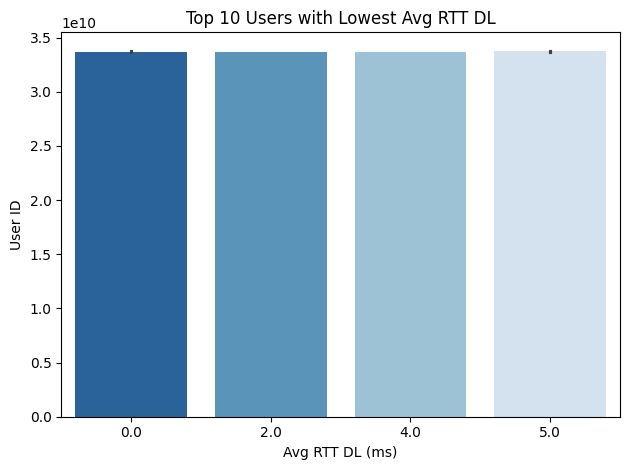

In [11]:
# Plot top 10 users with lowest RTT
sns.barplot(
    x="Avg RTT DL (ms)", 
    y="MSISDN/Number", 
    data=top_users_rtt, 
    palette="Blues_r"
)
plt.title("Top 10 Users with Lowest Avg RTT DL")
plt.xlabel("Avg RTT DL (ms)")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()


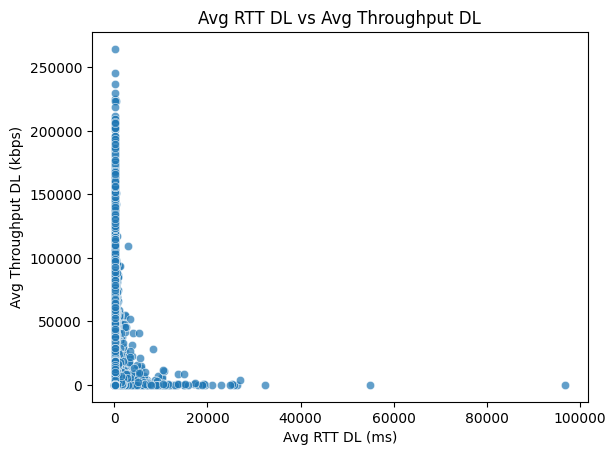

In [12]:
# Scatter plot for RTT DL vs Throughput DL
sns.scatterplot(
    x="Avg RTT DL (ms)", 
    y="Avg Throughput DL (kbps)", 
    data=experience_data, 
    alpha=0.7
)
plt.title("Avg RTT DL vs Avg Throughput DL")
plt.xlabel("Avg RTT DL (ms)")
plt.ylabel("Avg Throughput DL (kbps)")
plt.show()


C:\Users\user\AppData\Local\Temp\ipykernel_5416\4237855300.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


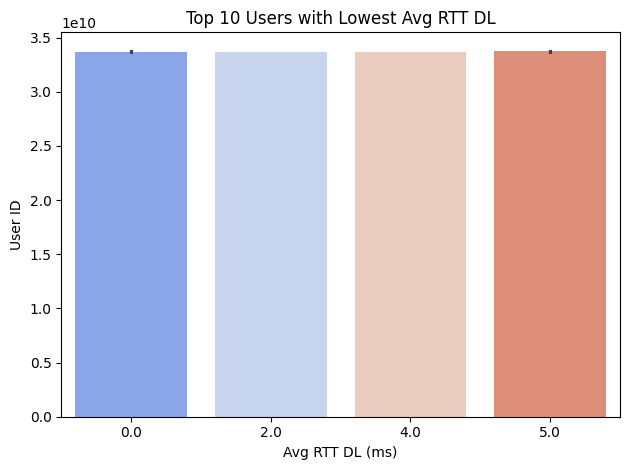

C:\Users\user\AppData\Local\Temp\ipykernel_5416\4237855300.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


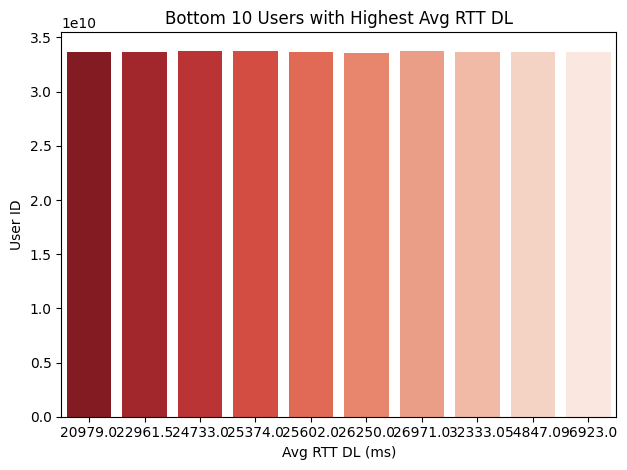

In [13]:
# Top Users by Avg RTT DL
sns.barplot(
    x="Avg RTT DL (ms)", 
    y="MSISDN/Number", 
    data=top_users_rtt, 
    palette="coolwarm"
)
plt.title("Top 10 Users with Lowest Avg RTT DL")
plt.xlabel("Avg RTT DL (ms)")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()

# Bottom Users by Avg RTT DL
sns.barplot(
    x="Avg RTT DL (ms)", 
    y="MSISDN/Number", 
    data=bottom_users_rtt, 
    palette="Reds_r"
)
plt.title("Bottom 10 Users with Highest Avg RTT DL")
plt.xlabel("Avg RTT DL (ms)")
plt.ylabel("User ID")
plt.tight_layout()
plt.show()


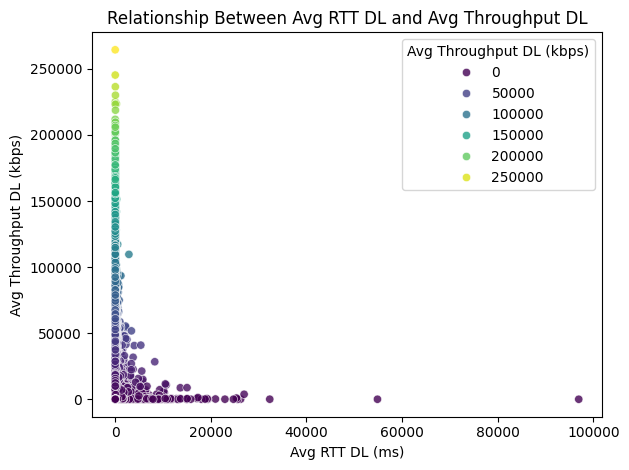

In [14]:
# Scatter plot for RTT DL vs Throughput DL
sns.scatterplot(
    x="Avg RTT DL (ms)", 
    y="Avg Throughput DL (kbps)", 
    data=experience_data, 
    hue="Avg Throughput DL (kbps)", 
    palette="viridis", 
    alpha=0.8
)
plt.title("Relationship Between Avg RTT DL and Avg Throughput DL")
plt.xlabel("Avg RTT DL (ms)")
plt.ylabel("Avg Throughput DL (kbps)")
plt.tight_layout()
plt.show()


In [17]:
# Select relevant metrics for correlation analysis
correlation_columns = [
    "Avg RTT DL (ms)", "Avg RTT UL (ms)", 
    "Avg Throughput DL (kbps)", "Avg Throughput UL (kbps)",
    "Total TCP Retransmissions DL (Bytes)", "Total TCP Retransmissions UL (Bytes)"
]


In [18]:
# Compute the correlation matrix
correlation_matrix = experience_data[correlation_columns].corr()
print(correlation_matrix)


                                      Avg RTT DL (ms)  Avg RTT UL (ms)  \
Avg RTT DL (ms)                              1.000000         0.007473   
Avg RTT UL (ms)                              0.007473         1.000000   
Avg Throughput DL (kbps)                    -0.031522         0.048439   
Avg Throughput UL (kbps)                    -0.017759         0.039449   
Total TCP Retransmissions DL (Bytes)         0.000863         0.022882   
Total TCP Retransmissions UL (Bytes)         0.000063         0.014632   

                                      Avg Throughput DL (kbps)  \
Avg RTT DL (ms)                                      -0.031522   
Avg RTT UL (ms)                                       0.048439   
Avg Throughput DL (kbps)                              1.000000   
Avg Throughput UL (kbps)                              0.571062   
Total TCP Retransmissions DL (Bytes)                  0.152160   
Total TCP Retransmissions UL (Bytes)                  0.026746   

                  

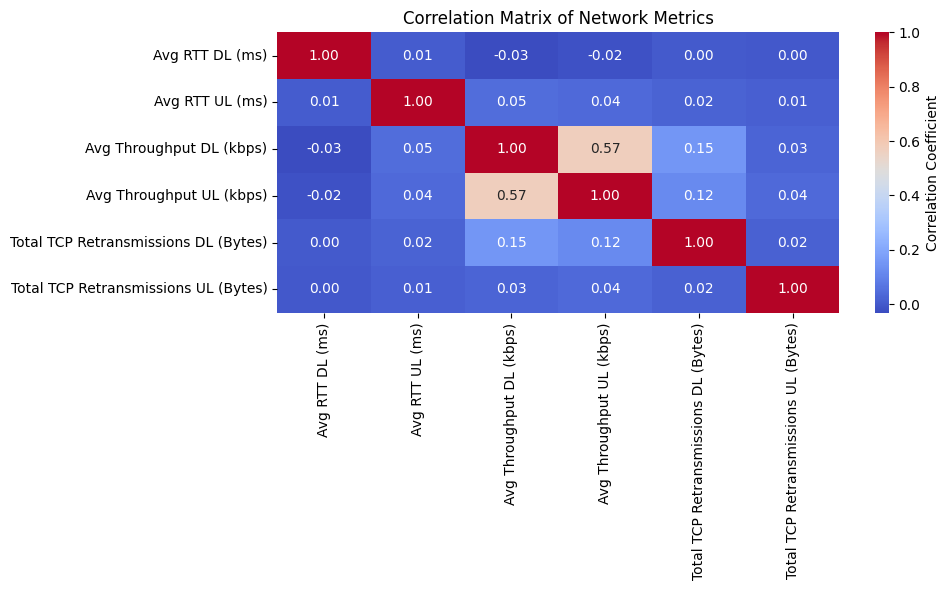

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap="coolwarm", 
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix of Network Metrics")
plt.tight_layout()
plt.show()


In [20]:
# Save experience data to CSV
experience_data.to_csv("..\Data\experience_data.csv", index=False)


In [21]:
from scipy.spatial.distance import euclidean
experience_data["Experience Score"] = experience_data.apply(
    lambda row: euclidean(
        row[[
            "Avg RTT DL (ms)", "Avg RTT UL (ms)", 
            "Avg Throughput DL (kbps)", "Avg Throughput UL (kbps)", 
            "Total TCP Retransmissions DL (Bytes)", "Total TCP Retransmissions UL (Bytes)"
        ]].values,
        experience_centroid
    ), axis=1
)

NameError: name 'euclidean' is not defined